In [1]:
import numpy as np
import imageio as img
from time import sleep
import sounddevice as sd
from scipy.io import wavfile
from scipy.ndimage import convolve
from matplotlib import pyplot as plt
import scipy

import cv2 as cv

In [2]:
class Sound:
    SampleRate = 0

    @staticmethod
    def open(path: str):
        """
        :param path: path to the target wave file
        :return: audio signal in np.ndarray form
        """
        Sound.SampleRate, sig = wavfile.read(path)

        return sig

    @staticmethod
    def draw(sig: np.ndarray, length: float, sig2: np.ndarray = None):
        """
        :param sig: the target signal to be drawn
        :param length: the length of the signal you want to be plotted
        :param sig2: [optional] second target signal to be drawn
        :return: None
        """
        length = int(length * Sound.SampleRate)
        length = min(len(sig), length) if sig2 is None else min(len(sig), len(sig2), length)
        if sig2 is not None:
            plt.subplot(2, 1, 1)
            plt.plot(sig2[:length])
            plt.subplot(2, 1, 2)
        else:
            plt.subplot(1, 1, 1)
        plt.plot(sig[:length])
        plt.show()

    @staticmethod
    def play(sig: np.ndarray):
        sd.play(sig, Sound.SampleRate)
        sleep(len(sig) / Sound.SampleRate)
        
        
    def speed(sig: np.ndarray, spd: float):
        
        if spd > 1:
            
            num_of_removals = len(sig) - int(len(sig) / spd)
            
            step = int(len(sig) / num_of_removals)

            to_remove = []
            index = 0
            for i in range(num_of_removals):
                to_remove.append(index)
                index = int(index + step)
            
            
            return np.delete(sig, to_remove, 0)

        elif spd < 1:

            num_of_appendants =  int(len(sig) / spd) - len(sig)
            step = len(sig) // num_of_appendants
            index = 0
            to_append = np.ones(len(sig)).astype(np.int16)


            for i in range(num_of_appendants):
                to_append[int(index)] += 1
                index += step
            return np.repeat(sig, to_append, 0)
        else:
            return sig



In [3]:
def scale(sound, scaling_length):
    return Sound.speed(sound, len(sound) / scaling_length)

numbers = []
for i in range(10):
    numbers.append(Sound.open('./1/' + str(i) + '.wav')[:, 0])
    
#Sound.draw(numbers[0], 10)


numbers[0] = numbers[0][5000: ]


scaling_length = len(numbers[0])
ind = 0
for i in range(1, 10):
    #print(len(sounds[i]), i)
    if len(numbers[i]) > scaling_length:
        scaling_length = len(numbers[i])
        ind = i

#scaling to the longest voice (7)

for i in range(10):
    #Sound.play(numbers[i])
    numbers[i] = scale(numbers[i], scaling_length)
 



In [4]:
fouriers = []
for i in range(10):
    fouriers.append(np.fft.fft(numbers[i]))



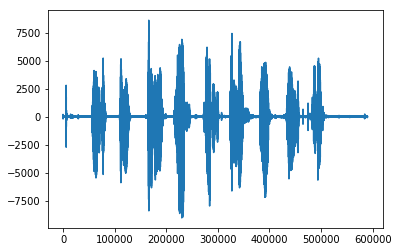

In [5]:
all_numbers = Sound.open('./1/numbers.wav')[:, 0]

Sound.draw(all_numbers, 20)

numbers_ind = [[55000, 80000], [111000, 129000], [165500, 192500], [219000, 244000], [274000, 291000], 
               [326000, 360000], [380000, 402000], [434000, 459000], [475000, 503000]]


numbers_from_all = [all_numbers[i[0]    : i[1]  ] for i in numbers_ind]
#for i in numbers_from_all:
#   Sound.play(i)


numbers_from_all = [scale(i, scaling_length) for i in numbers_from_all]




In [6]:
def distance(i, j):
    return np.abs(np.dot(i, j)) / ((np.math.sqrt(np.abs(np.dot(i, i)))) * (np.math.sqrt(np.abs(np.dot(j ,j)))))
                                                                                                                                         


all_numbers_fourie = [np.fft.fft(i) for i in numbers_from_all]
true_numbers = [1, 2, 4, 0, 7, 6, 9, 5, 8]


similarities = [[] for i in range(len(numbers_from_all))]

for i in range(len(numbers_from_all)):
    for j in range(len(fouriers)):
        similarities[i].append(distance(all_numbers_fourie[i], fouriers[j]))

nearest = []
for i in range(len(numbers_from_all)):
    nearest.append(similarities[i].index(max(similarities[i])))
    




for i in range(len(true_numbers)):
    print(nearest[i], true_numbers[i])




3 1
9 2
4 4
3 0
7 7
9 6
9 9
3 5
5 8


In [10]:
pulp_fiction = Sound.open('./2/Song.wav')

#Sound.play(pulp_fiction)


import scipy.fftpack
left = pulp_fiction[:, 0]
right = pulp_fiction[:, 1]

bottom = 4000000
length = 200000

lchunck = left[bottom : bottom + length]
rchunck = right[bottom : bottom + length]
#lfourie = np.fft.fft(lchunck)
rfourie = np.fft.fft(rchunck)
lfourie = np.fft.fft(lchunck)

#Sound.play(chunk)



[[    3     1]
 [   -2     0]
 [   -1    -1]
 ...
 [ -738  2506]
 [   11  6780]
 [ 3127 10340]]
[    1     0    -1 ...  2506  6780 10340]
6000000


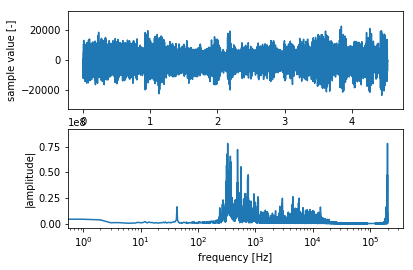

In [11]:
plt.figure(1)
a = plt.subplot(211)
r = 2**16/2
a.set_ylim([-r, r])
a.set_xlabel('time [s]')
a.set_ylabel('sample value [-]')
x = np.arange(length)/44100

plt.plot(x, lchunck)

b = plt.subplot(212)

b.set_xscale('log')
b.set_xlabel('frequency [Hz]')
b.set_ylabel('|amplitude|')
plt.plot(abs(lfourie))
plt.savefig('sample-graph.png')
#Sound.play(lchunck)


c:\users\ata jadid ahari\pycharmprojects\stack\venv\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


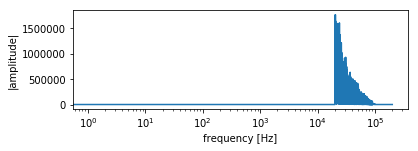

In [12]:

lowpass = 20000 
highpass = 100000

lfourie_drums = np.copy(lfourie)
rfourie_drums = np.copy(rfourie)

lfourie_drums[:lowpass] =  0 

rfourie_drums[: lowpass] = 0

lfourie_drums[highpass:] = 0 
rfourie_drums[highpass: ] = 0


b = plt.subplot(212)

b.set_xscale('log')
b.set_xlabel('frequency [Hz]')
b.set_ylabel('|amplitude|')
plt.plot(abs(lfourie_drums))
plt.savefig('sample-graph.png')


#nl, nr = np.fft.ifft(lfourie), np.fft.ifft(rfourie) # (4)
#ns = np.column_stack((nl,nr)).ravel().astype(np.int16)
nl = np.fft.ifft(lfourie_drums).astype(np.int16)
Sound.play(nl)


1.1028571428571428 2.1520861678004537 1.0492290249433107


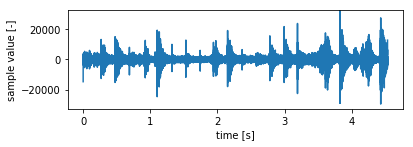

In [13]:
a = plt.subplot(211)
r = 2**16/2
a.set_ylim([-r, r])
a.set_xlabel('time [s]')
a.set_ylabel('sample value [-]')
x = np.arange(length)/44100

plt.plot(x, nl * 10)


#Sound.play(nl)

f = list(nl[1 * 44100: 2 * 44100]).index(max(nl[1 * 44100: 2 * 44100]))
l = list(nl[2 * 44100: int(2.5 * 44100)]).index(max(nl[2 * 44100: int(2.5 * 44100)]))
print((f / 44100) + 1, (l / 44100) + 2, (l / 44100) - (f / 44100) + 1)

